# Task 1

## Data

<!-- For ease of calculation and without loss of generality, let's set the Blue population at 900 and Red at 100 -->

*Will (not) use XAI* correspond to the true class

*(not) enrolled* corresponds to the predicted class

Blue is the privileged class

The preferred $Y=1$ true class is "Will use XAI"

The preferred $\hat{Y}=1$ predicted class is "enrolled"

<!-- | Blue  | Will use XAI  | Will not use XAI  | Total  |
|---|---|---|---|
|  Enrolled | 540 |45  | 585 |
| Not enrolled  | 180 | 135 | 315 |
|Total   | 720 | 180 | 900 | -->
| Blue  | Will use XAI  | Will not use XAI  | Total  |
|---|---|---|---|
|  Enrolled | 60 |5  | 65 |
| Not enrolled  | 20 | 15 | 35 |
|Total   | 80 | 20 | 100 |

| Red  | Will use XAI  | Will not use XAI  | Total  |
|---|---|---|---|
|  Enrolled | 25 | 25 | 50 |
| Not enrolled  | 25 | 25 | 50 |
|Total   | 50 | 50 | 100 |

## Demographic parity

Definition:    $ P(\hat{Y} = 1 | A = a) = P(\hat{Y} = 1 | A = b) $

Applied definition: $ P(\hat{Y} = enrolled | A = red) = P(\hat{Y} = enrolled | A = blue) $

Interpretation: Demographic parity is satisfied if the probability of getting enrolled is equal in both groups.

$P(\hat{Y}=enrolled |A=blue) = 65/100 = 0.65$

$ P(\hat{Y}=enrolled|A=red) = 50/100 = 0.5 $

$ \frac{P(\hat{Y}=enrolled |A=blue)}{P(\hat{Y}=enrolled|A=red)} = 0.65/0.5 = 1.3 > 1.25$

The predicted class is not independent from the protected attribute. Blue is privileged (more likely to get enrolled). The four-fifths rule is not satisfied.

## Equal opportunity

Definition:   $P(\hat{Y}=1|A=a,Y=1)=P(\hat{Y}=1|A=b,Y=1)$

Applied definition: $P(\hat{Y}=enrolled|A=blue,Y=will\_use)=P(\hat{Y}=enrolled|A=red,Y=will\_use)$

Interpretation: Equal opportunity is satisfied if the probability of getting enrolled is equal in both groups for those who will use XAI

$P(\hat{Y}=enrolled|A=blue,Y=will\_use) = 60/80 = 0.75$

$P(\hat{Y}=enrolled|A=red,Y=will\_use) = 25/50 = 0.5$

$ \frac{ P(\hat{Y}=enrolled|A=blue,Y=will\_use) }{P(\hat{Y}=enrolled|A=red,Y=will\_use)} = 0.75 / 0.5 = 1.5 > 1.25 $

The selection rates among positive true class are not equal between the groups. Blue is privileged, more likely to get enrolled if they would benefit. The four fifths rule is not satisfied.

## Predicitive rate parity

### Definition:

$ P(Y=1|A=a,\hat{Y}=1) = P(Y=1|A=b, \hat{Y}=1)$
$ P(Y=1|A=a,\hat{Y}=0) = P(Y=1|A=b, \hat{Y}=0)$


### Applied definition:

$ P(Y=will|A=blue,\hat{Y}=enrolled) = P(Y=will|A=red, \hat{Y}=enrolled)$
$ P(Y=will|A=blue,\hat{Y}=notenrolled) = P(Y=will|A=red, \hat{Y}=notenrolled)$


### Interpretation:

Among the enrolled, probability of using training in the future is independent of group.

Among the not enrolled, probability of needing the non-trained skills is independent of group.

$ P(Y=will|A=blue,\hat{Y}=enrolled) = 60/65 \approx 0.923 $

$ P(Y=will|A=red, \hat{Y}=enrolled) = 25 / 50  = 0.5 $

$ P(Y=will|A=blue,\hat{Y}=notenrolled) = 20 /35 \approx 0.571 $

$ P(Y=will|A=red,\hat{Y}=notenrolled) = 25 / 50 = 0.5 $

The predictive rate parity is not maintained between the groups. Among those receiving the training, those in the blue group are more likely to use the skills. Among those not enrolled, those in the blue group are more likely to need the skills in the future.

While the groups are not treated equally, it's hard to distinguish which group is truly privileged without knowing the benefit-to-cost ratio of the training.

# Task 2

##1

I chose the adult income dataset.

We are trying to predict whether an adult's annual income is <=50K USD or >50K USD based on 14 attributes from census data.

The feature "fnlwgt" is removed, as it is supposed to convey how representative a sample is for the overall US population. Our model is not capable of using that information.

As there is a natural order on the *education* feature, already expressed in the educational-num feature, we also exclude that one.

The native-country feature takes multiple values. To avoid overfitting, it is transformed into a binary feature indicating whether that country is the US.

The capital gains and capital loss features are quite sparse, but as they directly translate to income I decided to include them.

The other features seem reasonably promising.

Those earning above 50K were assigned class 1 as potentially desirable, to keep consistent with the lecture.

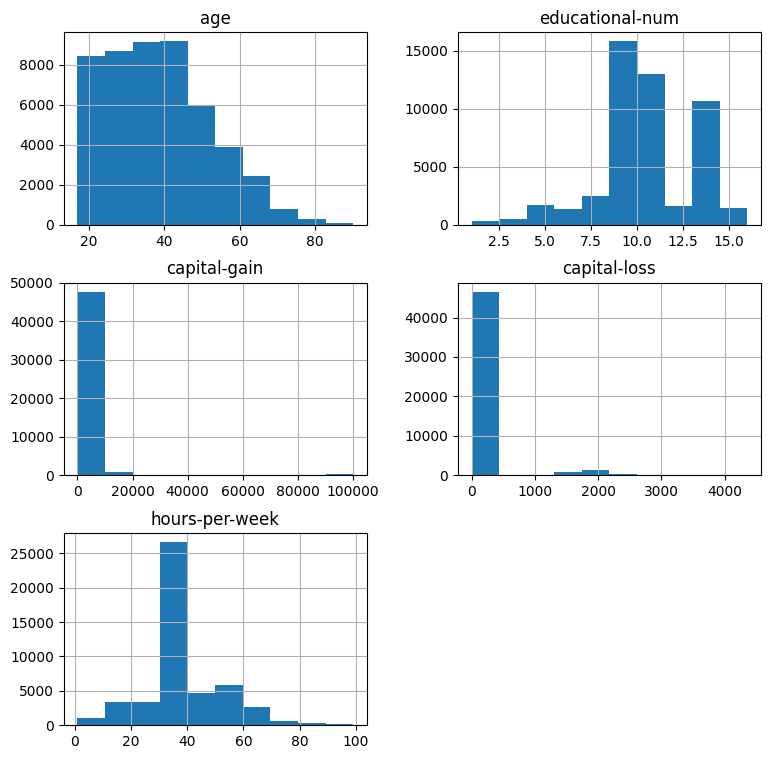

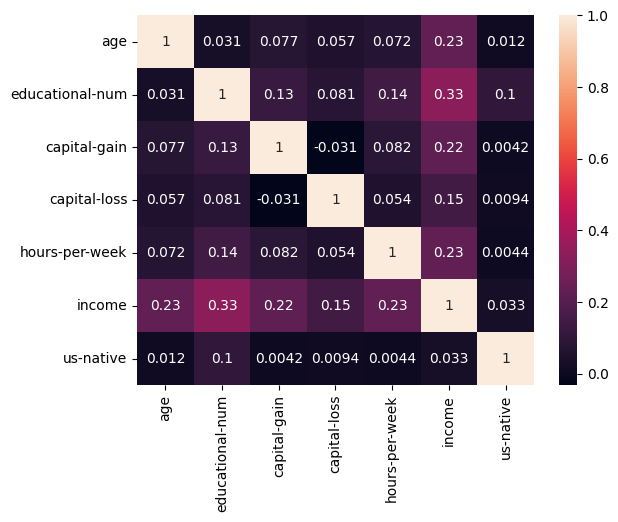

We can see multiple numerical features correlate with income, some correlate with each other. Interestingly, being a US native is surprisingly weakly correlated with other numerical features.

Approx 24% of the samples belong to the positive class.

We end up with 12 explanatory variables - 5 numerical and 7 categorical - and 1 label.

The dataset is split train-test 90-10. The results are reported on the test set.

The categorical features are one-hot-encoded, while the numerical features pass through a standard scaler.

I trained a LogisticRegression model with the default settings.


|      Model             |   Recall   |  Precision  |     F1     |  Accuracy  |     AUC    |
|------------------------|------------|------------|------------|------------|------------|
| Logistic Regression    |  0.615385  |  0.725026  |  0.665721  |  0.855271  |  0.906715  |


## 2

I chose gender as my protected attribute, with Male as the privileged class. Please note this attribute is directly included in the training data I pass to the model, which is a somewhat questionable decision.

Fairness coefficients for the initial model:

|non-privileged|     TPR    |     ACC    |     PPV    |     FPR    |     STP    |
|---|------------|------------|------------|------------|------------|
| Female  |  0.875598  |  1.149877  |  1.087866  |  0.169811  |  0.281369  |


Statistical parity and false positive rate ratio violate the 80% rule.

## 3

I trained a LogisticRegression, allowing the solver more iterations and reweighing the classes to be balanced.


|        |   Recall   |  Precision  |     F1     |  Accuracy  |     AUC    |
|--------|------------|------------|------------|------------|------------|
| Logistic Regression |  0.853147  |   0.56286  |   0.678249 |   0.81044  |   0.906672 |

|   |     TPR    |     ACC    |     PPV    |     FPR    |     STP    |
|---|------------|------------|------------|------------|------------|
| Female  |  0.926999  |  1.233023  |  1.111712  |  0.198653  |  0.293362  |



## 4

I decided to reweigh all samples, so that the positive samples with female gender carried weight equal to positive smaples with male gender. Symmetrically for negative.

|       |   Recall   |  Precision  |     F1     |  Accuracy  |     AUC    |
|-------|------------|------------|------------|------------|------------|
| Logistic Regression  |  0.811189  |   0.560386 |   0.662857 |   0.806755 |   0.896711 |

|   |     TPR    |     ACC    |     PPV    |     FPR    |     STP    |
|---|------------|------------|------------|------------|------------|
| Female  |  1.101377  |  1.115979  |  0.729412  |  0.579399  |  0.531017  |



## 5,6

The rebalancing efforts did not noticeably affect the quality of the model as measured by F1 and AUC. For an estimation of the statistical significance of the differences, crossvalidation would be necessary.

The bias mitigation by reweighing significantly improved statistical parity. This is expected, as with this reweighing the parity would be perfect for a naive classifier trained on just gender.

Interstingly, by improving STP we also significantly improved FPR. Unfortunately PPV was pushed outside the 80% rule bounds. TPR and ACC remained within the bounds.

It seems like reweighing the samples to match probability of label classes among samples of given protected characteristic group is an improvement, although it is not sufficient to achieve an acceptably unbiased classifier.

#Appendix

In [1]:
# Data downloaded manually due to kaggle limitations

In [2]:
!pip install dalex

In [3]:
import pandas as pd
df = pd.read_csv("adult.csv")

We are trying to predict whether an adult's annual income is <=50K USD or >50K USD based on 14 attributes from census data.

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [8]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [9]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [10]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [11]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

<Axes: >

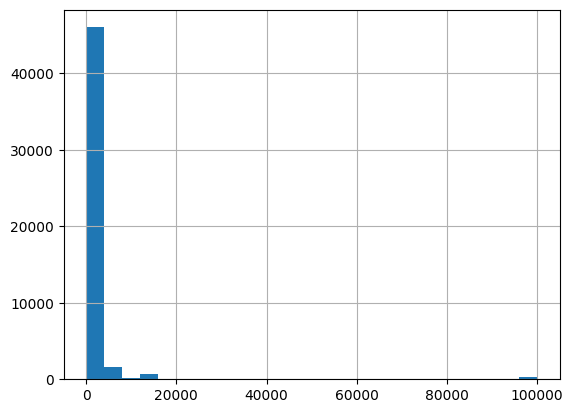

In [12]:
df['capital-gain'].hist(bins=25)

<Axes: >

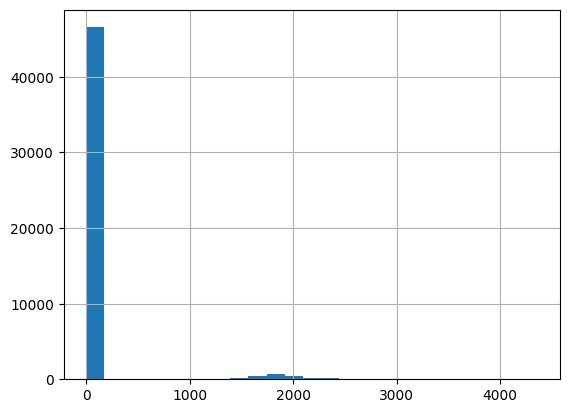

In [13]:
df['capital-loss'].hist(bins=25)

The feature "fnlwgt" is removed, as it is supposed to convey how representative a sample is for the overall US population. Our model is not capable of using that information.

As there is a natural order on the *education* feature, already expressed in the educational-num feature, we also exclude that one.

The native-country feature takes multiple values. To avoid overfitting, it is transformed into a binary feature indicating whether that country is the US.

The capital gains and capital loss features are quite sparse, but as they directly translate to income I decided to include them.

The other features seem reasonably promising.

Those earning above 50K were assigned class 1 as potentially desirable, to keep consistent with the lecture.

In [14]:
df['us-native'] = df['native-country']=='United-States'
df = df.drop(columns=['fnlwgt', 'native-country', 'education'])

In [15]:
df['income']=df['income'].map({'<=50K':False, '>50K':True})

<ipython-input-16-2f8a7f120ec2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

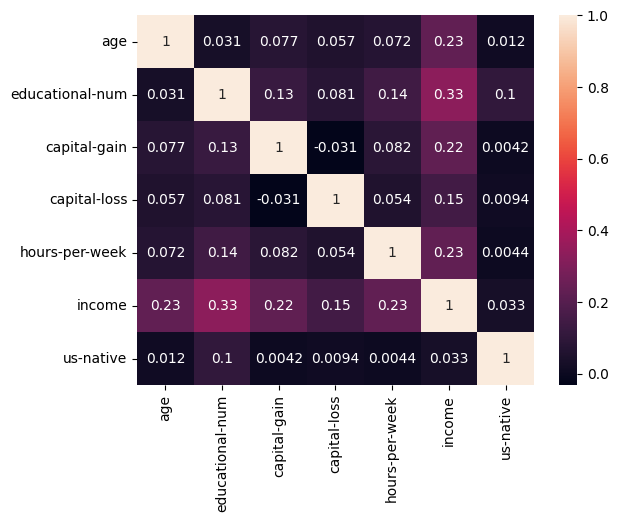

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)

We can see multiple numerical features correlate with income, some correlate with each other. Interestingly, being a US native is surprisingly weakly correlated with other numerical features.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educational-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>, <Axes: >]],
      dtype=object)

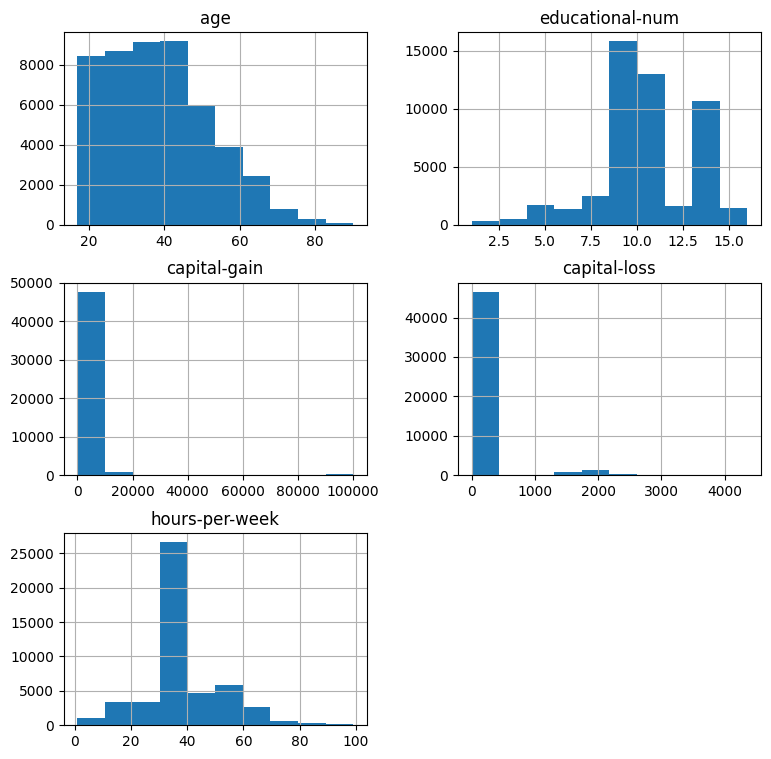

In [17]:
df.hist(figsize=(9,9))

In [18]:
df['income'].describe()

count     48842
unique        2
top       False
freq      37155
Name: income, dtype: object

In [19]:
37155/48842

0.7607182343065395

Approx 24% of the samples belong to the positive class.

In [20]:
X = df.loc[:, df.columns!='income']
y = df.loc[:, df.columns == 'income']

In [21]:
X

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,us-native
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,True
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,True
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,True
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,True
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30,True
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,True
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,True
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,True
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,True


In [22]:
y

,income
0,False
1,False
2,True
3,True
4,False
...,...
48837,False
48838,True
48839,False
48840,False


We end up with 12 explanatory variables - 5 numerical and 7 categorical - and 1 label.

In [23]:
from sklearn.model_selection import train_test_split
RANDOM_STATE=1337
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.1, random_state=RANDOM_STATE)

In [24]:
X_train.dtypes

age                 int64
workclass          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
us-native            bool
dtype: object

In [25]:
y_train.dtypes

income    bool
dtype: object

In [26]:
df.dtypes

age                 int64
workclass          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
income               bool
us-native            bool
dtype: object

In [27]:
numerical_columns = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'us-native']

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

def get_logreg():

  numeric_transformer = Pipeline(steps=[
      ('scaler', StandardScaler())
  ])

  categorical_transformer = Pipeline(steps=[
      ('onehot', OneHotEncoder())
  ])

  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, numerical_columns),
          ('cat', categorical_transformer, categorical_columns)
      ])

  pipeline = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('model', LogisticRegression())
  ])

  return pipeline

In [29]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def score_set(true, pred, prob):
  accuracy = accuracy_score(true, pred)
  precision = precision_score(true, pred)
  recall = recall_score(true, pred)
  f1 = f1_score(true, pred)
  rocauc = roc_auc_score(true, prob)

  print("Accuracy Score:", accuracy)
  print("Precision Score:", precision)
  print("Recall Score:", recall)
  print("F1 Score:", f1)
  print("AUC-ROC Score:", rocauc)


def score_single(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)

  train_pred = model.predict(xtrain)
  train_prob = model.predict_proba(xtrain)[:, 1]

  test_pred = model.predict(xtest)
  test_prob = model.predict_proba(xtest)[:, 1]

  print("TRAIN:")
  score_set(ytrain, train_pred, train_prob)

  print("TEST:")
  score_set(ytest, test_pred, test_prob)


In [30]:
np.random.seed(RANDOM_STATE)
res = score_single(get_logreg(), X_train, y_train, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TRAIN:
Accuracy Score: 0.8516732261073322
Precision Score: 0.7343040186371579
Recall Score: 0.5979322773404154
F1 Score: 0.6591384358009201
AUC-ROC Score: 0.9067685093281694
TEST:
Accuracy Score: 0.8552712384851586
Precision Score: 0.7250257466529351
Recall Score: 0.6153846153846154
F1 Score: 0.6657210401891253
AUC-ROC Score: 0.9067153943356829


In [31]:
import dalex as dx

model = get_logreg()
model.fit(X_train, y_train)
explainer = dx.Explainer(model, X_test, y_test, label='Logistic Regression')
explainer.model_performance()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Preparation of a new explainer is initiated

  -> data              : 4885 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 4885 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Logistic Regression
  -> predict function  : <function yhat_proba_default at 0x7e83ccd28790> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.000224, mean = 0.24, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.0057, max = 0.998
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,recall,precision,f1,accuracy,auc
Logistic Regression,0.615385,0.725026,0.665721,0.855271,0.906715


I chose protected attribute: gender.

In [32]:
X_train['gender'].value_counts()

Male      29424
Female    14533
Name: gender, dtype: int64

In [33]:
fobject = explainer.model_fairness(protected=X_test['gender'], privileged="Male")

In [34]:
fobject.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Male'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
             TPR       ACC       PPV       FPR       STP
Female  0.875598  1.149877  1.087866  0.169811  0.281369


Equal opportunity: TPR
Statistical parity: STP
Positive predictive parity: PPV

In [35]:
fobject.plot()

## Second model (balanced class weight, more iterations)

In [36]:
def get_lr2():

  numeric_transformer = Pipeline(steps=[
      ('scaler', StandardScaler())
  ])

  categorical_transformer = Pipeline(steps=[
      ('onehot', OneHotEncoder())
  ])

  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, numerical_columns),
          ('cat', categorical_transformer, categorical_columns)
      ])

  pipeline = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('model', LogisticRegression(class_weight='balanced', max_iter=1000))
  ])

  return pipeline

In [37]:
model = get_lr2()
model.fit(X_train, y_train)
explainer = dx.Explainer(model, X_test, y_test, label='Logistic Regression')
explainer.model_performance()
fobject = explainer.model_fairness(protected=X_test['gender'], privileged="Male")
fobject.fairness_check()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Preparation of a new explainer is initiated

  -> data              : 4885 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 4885 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Logistic Regression
  -> predict function  : <function yhat_proba_default at 0x7e83ccd28790> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.000591, mean = 0.366, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.131, max = 0.994
  -> model_info        : package sklearn

A new explainer has been created!
Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by ep

In [38]:
explainer.model_performance()

,recall,precision,f1,accuracy,auc
Logistic Regression,0.853147,0.56286,0.678249,0.81044,0.906672


In [39]:
fobject.plot()

## Third model (weighing to match class freqs in gender groups)

In [40]:
x_male = X_train['gender']=='Male'

In [41]:
male_y_train = y_train[x_male]

In [42]:
total = len(y_train)
male_pos = male_y_train.sum()
male_neg = len(male_y_train)-male_pos

In [43]:
female_y_train = y_train[~ x_male]
female_pos = female_y_train.sum()
female_neg = len(female_y_train) - female_pos

In [44]:
weights = np.ones_like(x_male, dtype='float')

In [45]:
is_positive = y_train.income == True

In [46]:
is_pos_fem = ~x_male & is_positive

In [47]:
weights[x_male & is_positive]=total/male_pos
weights[x_male & ~is_positive]=total/male_neg
weights[~x_male & is_positive]=total/female_pos
weights[~x_male & ~is_positive]=total/female_neg

In [48]:
sum(weights[x_male & is_positive])

43957.000000003274

In [49]:
sum(weights[~x_male & is_positive])

43957.000000001455

In [50]:
weights

array([2.14686203, 4.91194547, 2.14686203, ..., 2.14686203, 3.39724863,
       2.14686203])

In [51]:
model = get_logreg()
model.fit(X_train, y_train, **{"model__sample_weight":weights})
explainer = dx.Explainer(model, X_test, y_test, label='Logistic Regression')
print(explainer.model_performance())
fobject = explainer.model_fairness(protected=X_test['gender'], privileged="Male")
fobject.fairness_check()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Preparation of a new explainer is initiated

  -> data              : 4885 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 4885 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Logistic Regression
  -> predict function  : <function yhat_proba_default at 0x7e83ccd28790> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.000569, mean = 0.364, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.13, max = 0.997
  -> model_info        : package sklearn

A new explainer has been created!
Bias detected in 3 metrics: PPV, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set b

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [52]:
explainer.model_performance()

,recall,precision,f1,accuracy,auc
Logistic Regression,0.811189,0.560386,0.662857,0.806755,0.896711


In [53]:
fobject.plot()